<a href="https://colab.research.google.com/github/sathish-1804/Fashion-Recommendation-System/blob/master/Fashion_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from zipfile import ZipFile
import os

zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['__MACOSX', 'women fashion']


In [25]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['royal blue off-shoulder dress.jpg',
  'blue dress with a floral pattern.jpg',
  'sophisticated black dress with an asymmetrical design with one sleeve and a strapless neckline on the opposite side.jpg',
  'light blue, sequined dress with a V-neckline, long sleeves.jpg',
  'fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg',
  'light green, short dress with lace detailing around the waist and the edges of the sleeves and hem.jpg',
  'bright red, sequined dress with thin shoulder straps.jpg',
  'fitted, short, yellow dress with short sleeves.jpeg',
  'fitted dress with a classic black and white houndstooth pattern.webp',
  'flowing green off-shoulder dress.jpg'],
 97)

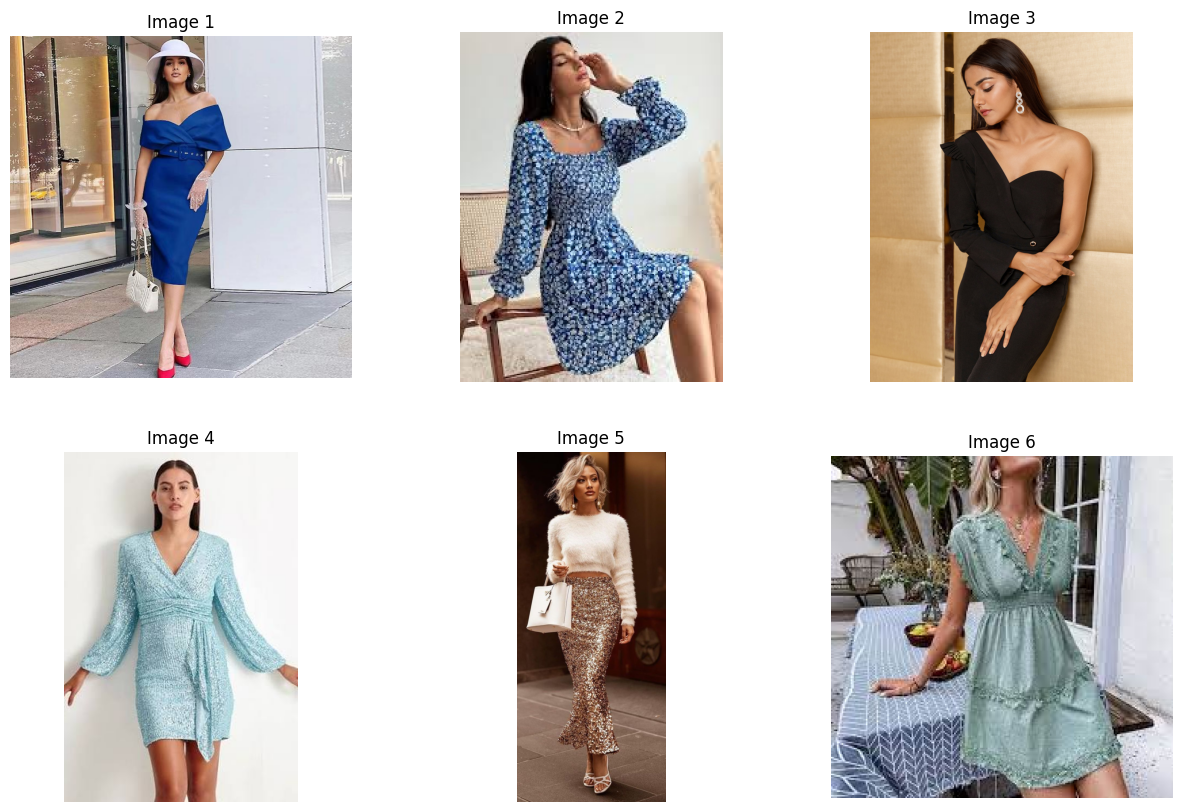

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_images(file_paths):
    num_images = len(file_paths)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of images and desired aspect ratio

    for i, file_path in enumerate(file_paths, start=1):
        image = Image.open(file_path)
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Image {i}')  # Add title with image index
        image.close()  # Close image to release memory
    plt.show()

# Example usage:
extracted_files_updated = os.listdir(extraction_directory_updated)
file_paths = [os.path.join(extraction_directory_updated, file) for file in extracted_files_updated[:6]]

display_images(file_paths)


In [16]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/royal blue off-shoulder dress.jpg', '/content/women_fashion/women fashion/blue dress with a floral pattern.jpg', '/content/women_fashion/women fashion/sophisticated black dress with an asymmetrical design with one sleeve and a strapless neckline on the opposite side.jpg', '/content/women_fashion/women fashion/light blue, sequined dress with a V-neckline, long sleeves.jpg', '/content/women_fashion/women fashion/fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg', '/content/women_fashion/women fashion/light green, short dress with lace detailing around the waist and the edges of the sleeves and hem.jpg', '/content/women_fashion/women fashion/bright red, sequined dress with thin shoulder straps.jpg', '/content/women_fashion/women fashion/fitted, short, yellow dress with short sleeves.jpeg', '/content/women_fashion/women fashion/fitted dress with a classic black and white houndstooth pattern.webp', '/content/women_fashion/wom

In [17]:
len(image_paths_list)

96

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 [==============================] - 0s 478ms/step


In [39]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 486ms/step


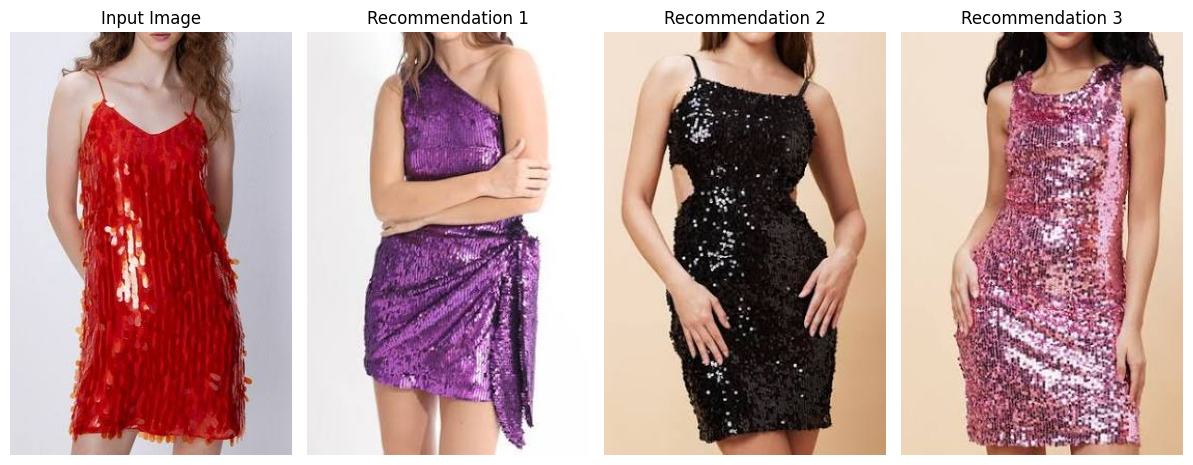

In [40]:
input_image_path = '/content/women_fashion/women fashion/bright red, sequined dress with thin shoulder straps.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)